# Analisando notas em geral

In [3]:
import pandas as pd

notas = pd.read_csv("ml-latest-small/ratings.csv")

##Traz os 5 primeiros itens da coluna
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
##Traz o número de linhas e colunas presentes na tabela de dados
notas.shape 

(100836, 4)

In [6]:
##Alterando os nomes das colunas
notas.columns = ["UsuarioID", "FilmeId", "Nota", "Momento"]
notas.head()

,UsuarioID,FilmeId,Nota,Momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [7]:
##Trazer todas as informações de apenas uma coluna, isso a transforma em uma série de valores. Chamado de pandas series
notas['Nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: Nota, Length: 100836, dtype: float64

In [9]:
##Trazer os valores Únicos de uma série de dados
notas['Nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [11]:
##Trazer o número de vezes que cada valor apareceu em determinada coluna
notas['Nota'].value_counts()

Nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [13]:
##Trazer a média dos valores de uma coluna.
notas['Nota'].mean()

3.501556983616962

In [15]:
#Outra maneira de ler a coluna é colocar o nome dela + . + 'nome da coluna'
notas.Nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: Nota, dtype: float64

<Axes: >

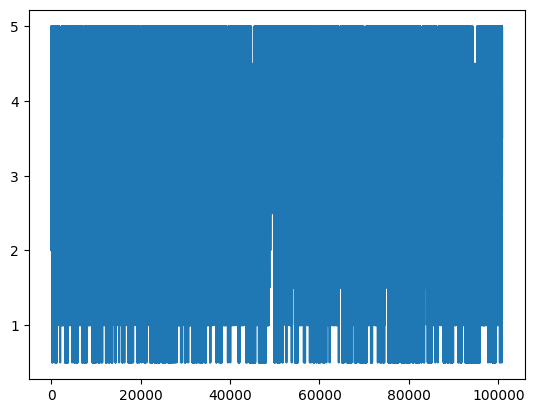

In [18]:
#O processo de trazer os dados de uma maneira "visual" no pandas é chamado de PLOTAR
notas.Nota.plot()

<Axes: ylabel='Frequency'>

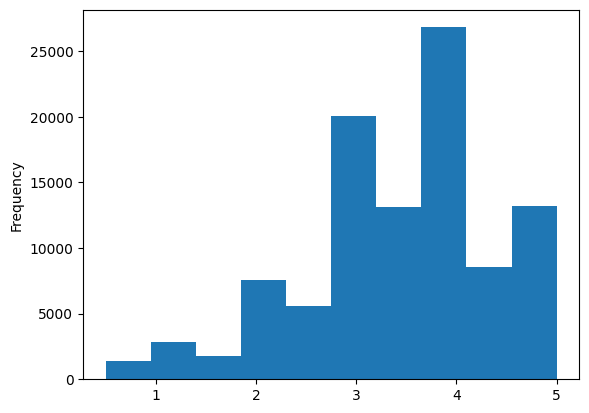

In [21]:
#Para que o gráfico tenha setido, existem formas de chama-lo, o tipo "hist" seria histograma, ele basicamente conta a história dos dados que se está analisando, neste caso
#ele está contando quantas vezes cada nota apareceu
notas.Nota.plot(kind='hist')

In [26]:
#Trazendo a mediana (valor que fica exatamente no meio entre os maiores e menores valores)
#Colocar uma vírgula entre uma string e variavel no print, dá um espaço na saída

print("Media",notas['Nota'].mean())
print("Mediana",notas['Nota'].median())

Media 3.501556983616962
Mediana 3.5


In [29]:
#Comando para trazer uma descrição (informações básicas) de uma série

notas.Nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: Nota, dtype: float64

In [32]:
#Importando outra biblioteca de visualização 'seaborn'
import seaborn as sns

<Axes: ylabel='Nota'>

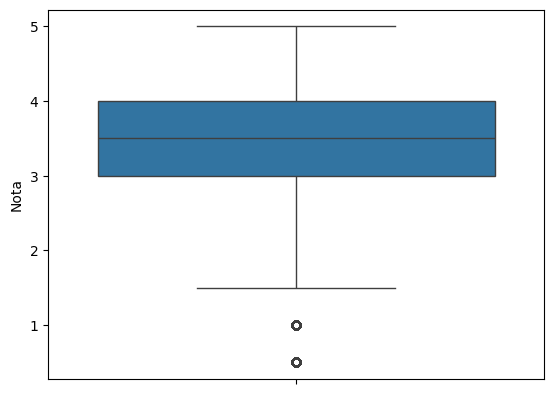

In [33]:
#plotando com o seaborn
sns.boxplot(notas.Nota)

# Carregando os Filmes

In [39]:
#Carregando a base de filmes
filmes = pd.read_csv('ml-latest-small/movies.csv')
filmes.columns = ['FilmeId', 'Titulo', 'Generos']
filmes.head()

,FilmeId,Titulo,Generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analisando algumas notas específicas por filmes

In [41]:
#Trazendo as notas somente do filme com o Id 1
notas.query('FilmeId==1').Nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: Nota, Length: 215, dtype: float64

In [42]:
#Trazendo a média de notas para o filme com id 1
notas.query('FilmeId==1').Nota.mean()

3.9209302325581397

In [43]:
notas.query('FilmeId==2').Nota.mean()

3.4318181818181817

In [47]:
#Pegando a média agrupando por filme (para n precisar pegar um por um)
medias_por_filme = notas.groupby('FilmeId').mean()['Nota']
medias_por_filme.head()

FilmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: Nota, dtype: float64

<Axes: ylabel='Frequency'>

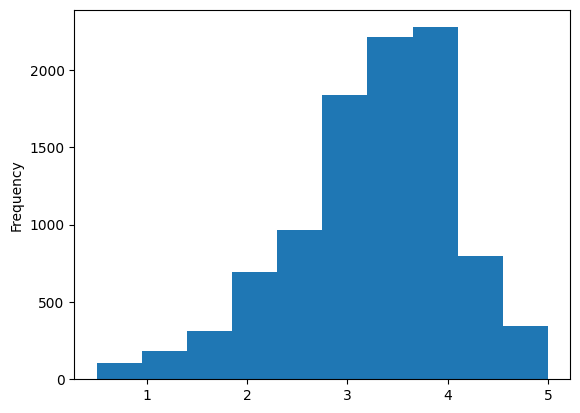

In [48]:
#Plotando as medias por filme
medias_por_filme.plot(kind='hist')

<Axes: ylabel='Nota'>

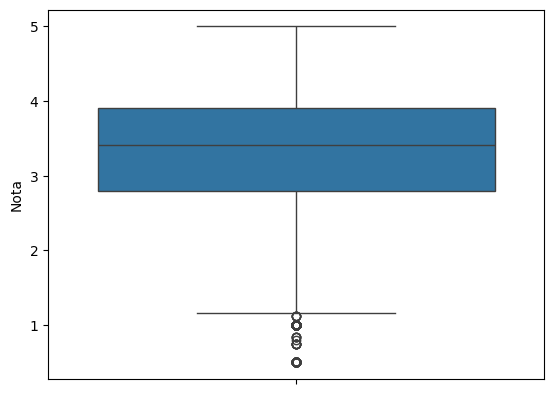

In [49]:
sns.boxplot(medias_por_filme)

In [50]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: Nota, dtype: float64

C:\Users\gabrielbrito\AppData\Local\Temp\ipykernel_14040\2765900262.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme)


<Axes: xlabel='Nota', ylabel='Density'>

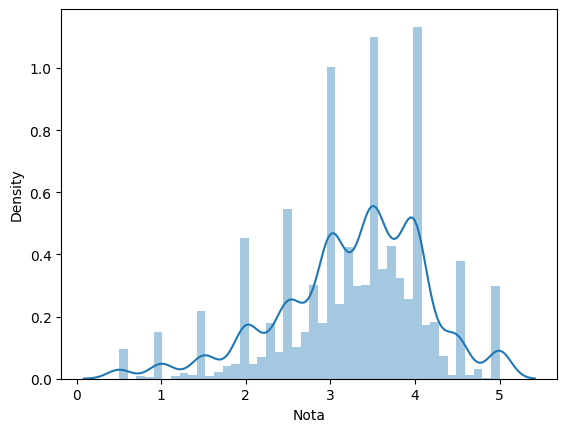

In [53]:
#Plotando um grafico com o seaborn
sns.distplot(medias_por_filme)

In [59]:
#Importando modulo de graficos
import matplotlib.pyplot as plt

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

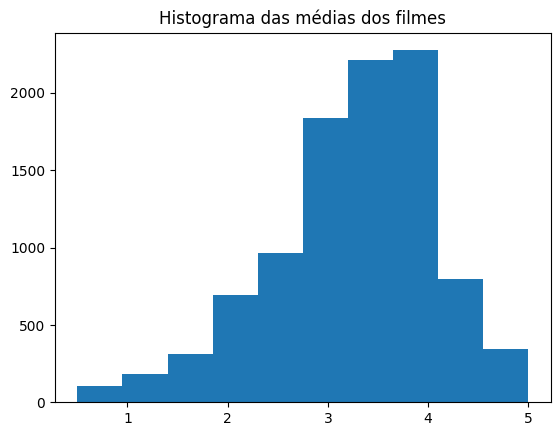

In [58]:
plt.title('Histograma das médias dos filmes')
plt.hist(medias_por_filme)

(array([ 108.,  185.,  309.,  694.,  962., 1840., 2211., 2275.,  798.,
         342.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

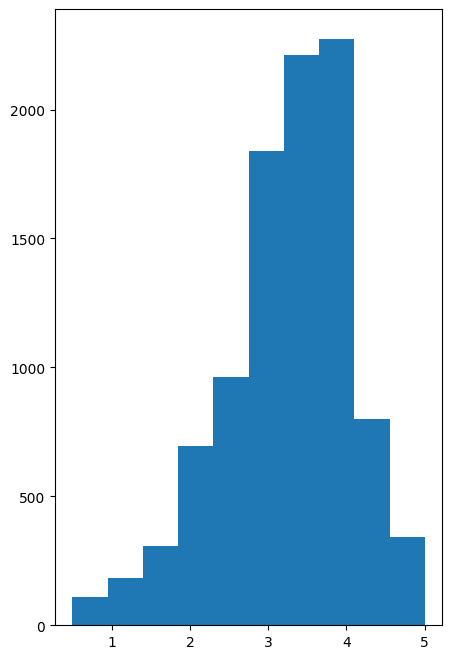

In [62]:
#Mudando o tamanho da figura (visual)
plt.figure(figsize=(5,8))
plt.hist(medias_por_filme)

# Carregando dados do TMDB

In [65]:
tmdb = pd.read_csv('archive/tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# Analisando tipos de variaveis (categorias) TMDB

In [66]:
tmdb.original_language.unique() #categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [67]:
#primeiro grau
#segundo grau
#terceiro grau
# 1 grau < 2 grau < 3 grau #categoria ordinal

In [ ]:
#budgewt => orcamento => quantitativa continuo

In [ ]:
#quantidade de votos => 1,2,3,4 não há como ter 2.5 votos.
#notas movielens => 0.5, 1, 1.5,...5 não tem 2.7

In [74]:
#Transformando a serie em um data frame
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_language', 'Total']
contagem_de_lingua.head()

,original_language,Total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='original_language', ylabel='Total'>

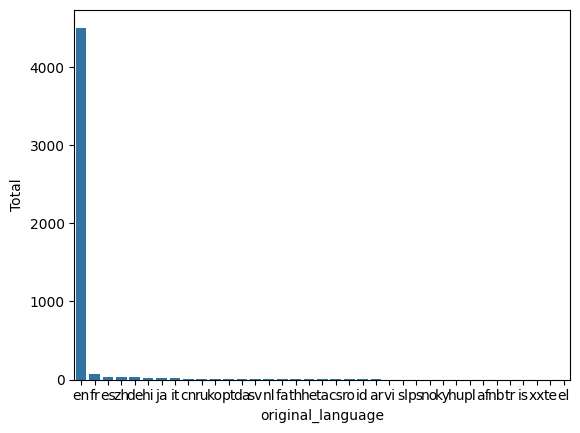

In [76]:
#Criando um grafico de barras a partir da plotagem como data frame

sns.barplot(x= 'original_language', y='Total', data  = contagem_de_lingua)


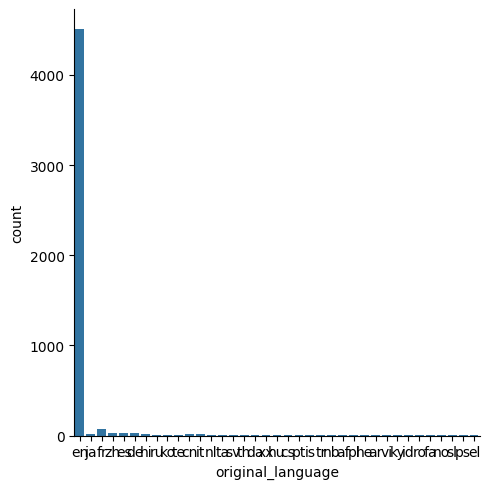

In [77]:
#Chamando um grafico de barras de maneira mais simplificada
sns.catplot(x='original_language', kind='count',data=tmdb)

([<matplotlib.patches.Wedge at 0x1989d35d9d0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text(

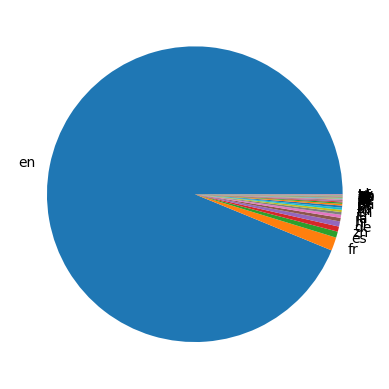

In [79]:
#Criando um grafico de pizza (pouquíssimo utilizado)
plt.pie(contagem_de_lingua['Total'], labels = contagem_de_lingua['original_language'])

In [81]:
#Utilizando o 'loc' para localizar uma valor dentro da coluna
#categorizando por total de ingles e total do resto
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_em_inlgles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_em_inlgles
print(total_em_inlgles,total_do_resto)

4505 298


<Axes: xlabel='lingua', ylabel='total'>

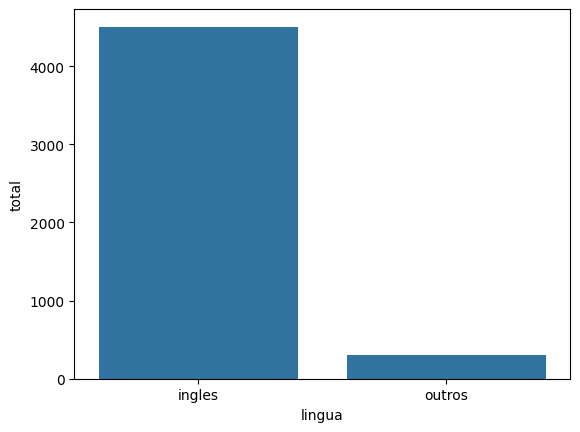

In [88]:
#Criando um dicionário com os dados desejados
dados = {
    'lingua' : ['ingles' , 'outros'],
    'total' : [total_em_inlgles, total_do_resto]
}

#Transformando os dados em data frame
dados = pd.DataFrame(dados)
dados

#Plotando os dados
sns.barplot(x='lingua', y ='total', data=dados)